In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import cv2

import torch
from torchvision import models
import torchvision.transforms as T

import numpy as np
import utils
from utils import ImagePair, ImageMatcher
import h5py
from scipy.spatial.transform import Rotation as Rot

In [3]:
# Load a pre-trained DeepLabV3 model
model = models.segmentation.deeplabv3_resnet101(
    weights=models.segmentation.DeepLabV3_ResNet101_Weights.DEFAULT
).eval()

In [7]:
DATA_DIR = '/Users/richard/Desktop/Dataset/'
frames = utils.load_video(DATA_DIR + '3-3-v001-t000.mp4', grayscale=False, n_frames=500)

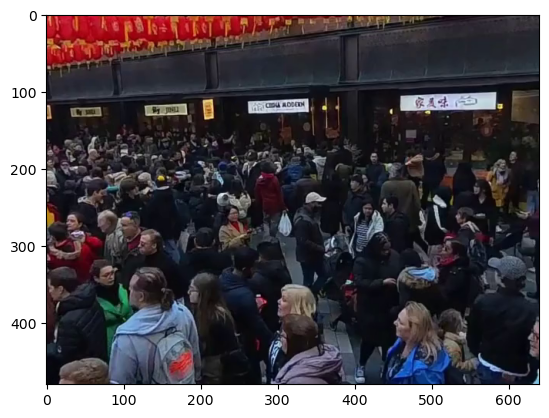

In [17]:
frame = frames[250]
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

In [18]:
#transform = T.Compose([T.ToPILImage(), T.Resize((240, 320)), T.ToTensor()])
transform = T.Compose([T.ToTensor()])
input_tensor = transform(frame).unsqueeze(0)

with torch.no_grad():
    output = model(input_tensor)['out'][0]

# Get the segmentation mask for humans (COCO class 15)
segmentation_mask = output.argmax(0).numpy() == 15

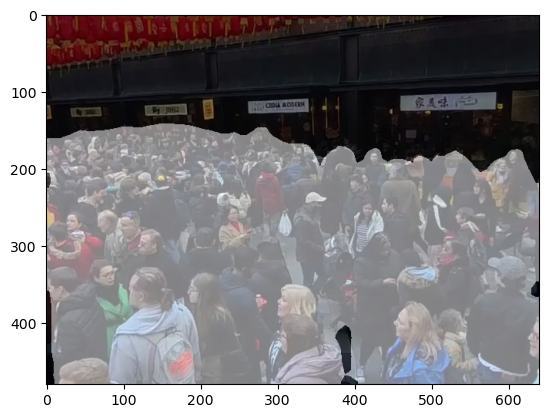

In [19]:
#plt.imshow(cv2.cvtColor(cv2.resize(frame, (320, 240)), cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.imshow(segmentation_mask, cmap='gray', alpha=0.5)
plt.show()